# EDA (Exploratory Data Analysis)

- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**
1. Describing the data
2. Data cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformations

**Import data and data description**

In [2]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/refs/heads/main/data_clean.csv', index_col=0)
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [4]:
df.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [6]:
df.head(2)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C


In [5]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 11.1+ KB


- As we can see that,
- 'Month' column has all the numeric data still python has shown us that it is object.
- We will have to find out the reason and change the data type of the column.

# **Data type conversion**

In [8]:
df['Month']

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: object

In [9]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [10]:
df['Month'].value_counts()

Month
9      34
5      31
8      31
7      31
6      30
May     1
Name: count, dtype: int64

In [11]:
df['Month'].replace('May',5,inplace=True)

In [12]:
df['Month'].unique()

array(['5', 5, '6', '7', '8', '9'], dtype=object)

In [13]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [15]:
df['Month'].astype(int)

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: int64

In [33]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [16]:
df['Month'] = df['Month'].astype(int)

In [17]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month        int64
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [18]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S
157,14.0,191.0,14.3,9,28,2010,75,S


# Duplicates

In [4]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [5]:
df.duplicated().sum()

np.int64(1)

In [ ]:
#Drop Duplicated records

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(157, 8)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,2010,68,S
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S


# Drop columns

- There is one column which only has single different value.
- We need to get rid of all the uneccesary columns or else it will be very complex data.

In [10]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S


In [ ]:
df.drop(columns=['Year'],inplace=True)

In [ ]:
df

# Rename the columns

In [ ]:
df.head()

In [ ]:
df.rename(columns={'Solar.R':'Solar','Temp':'Temperature'},inplace=True)

In [ ]:
df

# Missing value imputation

- In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
    - Incomplete data entry
    - Issues with machines
    - Improper handling of data
    - And many more.
         

In [ ]:
#Checking null values

In [ ]:
df

In [11]:
df.isna()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False
156,True,False,False,False,False,False,False,False


In [12]:
df.isnull()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False
156,True,False,False,False,False,False,False,False


In [ ]:
len(df)

In [13]:
df.isna().sum()

Ozone      38
Solar.R     7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [15]:
missing_percentage = [(i / len(df)) * 100 for i in df.isna().sum()]
missing_percentage

[24.203821656050955,
 4.45859872611465,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.910828025477707]

In [14]:
#Calculate the percentage of missig values in each column.
for i in df.isna().sum():
    print((i/len(df))*100)

24.203821656050955
4.45859872611465
0.0
0.0
0.0
0.0
0.0
1.910828025477707


# Rule for missing value imputation:
1. If NA values are between 1 to 5%, drop na (rows)
2. If NA value are 5 to 40%, fillna(replace)
3. If NA values are greater than 50% in a column, drop that entire column.

In [16]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S


In [17]:
df['Ozone'].median()

np.float64(31.0)

In [18]:
ozone_median = df['Ozone'].median()
ozone_median

np.float64(31.0)

In [38]:
df['Ozone'].fillna(ozone_median, inplace=True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_16504\3458414247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ozone'].fillna(ozone_median, inplace=True)
C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_16504\3458414247.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ozone'].fillna(ozone_median

In [36]:
# df['Ozone'] = df['Ozone'].fillna(ozone_median)

df['Ozone'] = df['Ozone'].copy().fillna(ozone_median, inplace=True)

In [23]:
df.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [27]:
df = df.rename(columns={'Solar.R': 'Solar'})
df['Solar'].mean()

np.float64(185.36666666666667)

In [28]:
df['Solar'].fillna(df['Solar'].mean(), inplace=True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_16504\1915538960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Solar'].fillna(df['Solar'].mean(), inplace=True)


In [29]:
df['Weather'].mode()

0    S
Name: Weather, dtype: object

In [30]:
df['Weather'].mode()[0]

'S'

In [31]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_16504\3195599284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)


In [32]:
df.isna().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

# Outlier detection

- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [39]:
df.describe()

,Ozone,Solar,Wind,Day,Year,Temp
count,157.0,157.000000,157.000000,157.000000,157.0,157.000000
mean,31.0,185.366667,9.929936,15.929936,2010.0,77.745223
std,0.0,86.998999,3.505188,8.974404,0.0,9.405334
min,31.0,7.000000,1.700000,1.000000,2010.0,56.000000
25%,31.0,127.000000,7.400000,8.000000,2010.0,72.000000
50%,31.0,193.000000,9.700000,16.000000,2010.0,79.000000
75%,31.0,255.000000,11.500000,24.000000,2010.0,84.000000
max,31.0,334.000000,20.700000,31.000000,2010.0,97.000000


<Axes: >

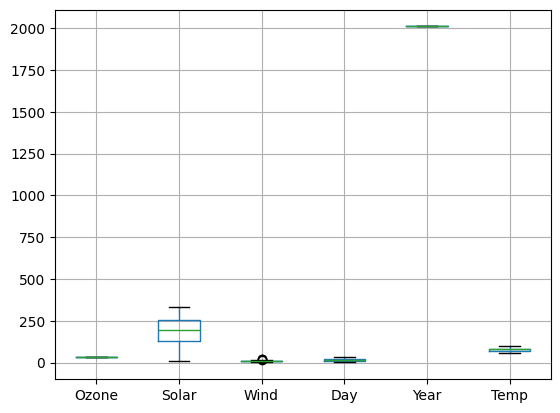

In [40]:
df.boxplot()

In [46]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10,5)

In [49]:
# df.hist()

<Axes: >

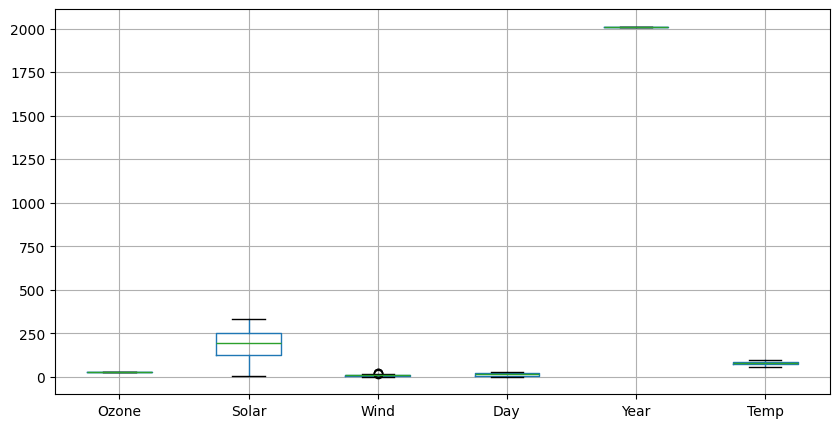

In [48]:
df.boxplot()

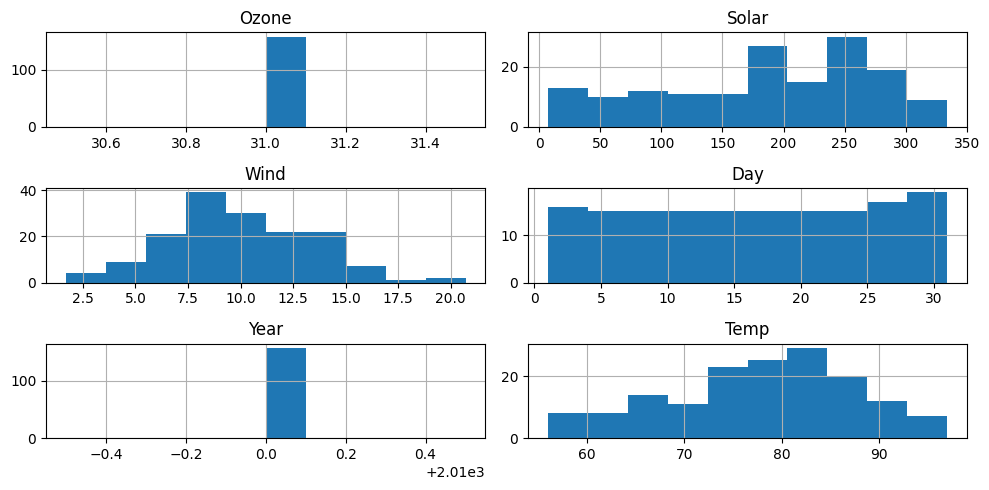

In [50]:
df.hist()
plt.tight_layout()

In [ ]:
#Outlier detection function

In [7]:
import numpy as np

numbers = np.array([2, 8, 5, 10, 3])
result = np.where(numbers > 5, "High", "Low")

print(result)

['Low' 'High' 'Low' 'High' 'Low']


In [8]:
import numpy as np

numbers = np.array([2, 8, 5, 10, 3])
result = np.where(numbers == 5, "Same", np.where(numbers > 5, "High", "Low"))

print(result)

['Low' 'High' 'Same' 'High' 'Low']


<Axes: xlabel='Ozone'>

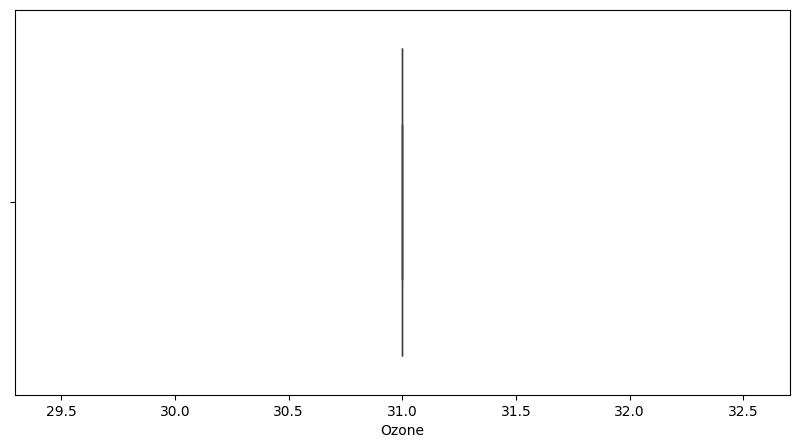

In [58]:
sns.boxplot(x = df['Ozone'])

In [59]:
df.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

In [60]:
df['Ozone'].quantile(0.75)

np.float64(31.0)

In [61]:
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [ ]:
#Capping Outliers

In [62]:
df.drop(columns=['Weather']).columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 11.1+ KB


In [68]:
capping(df, df.drop(columns=['Weather', 'Month']).columns)

<Axes: >

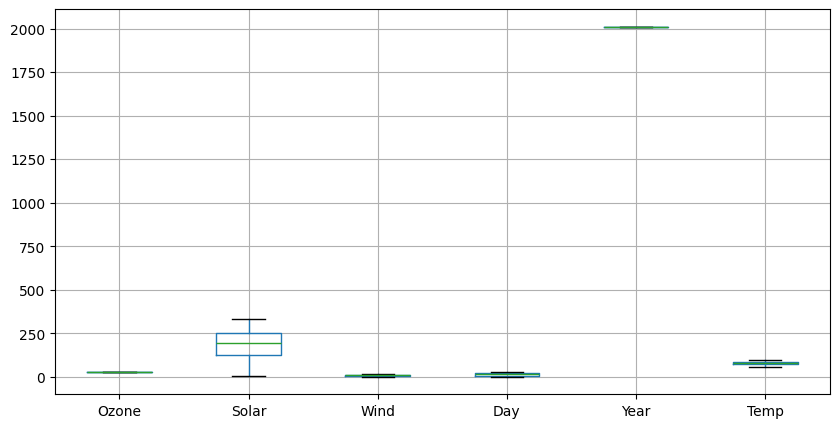

In [66]:
df.boxplot()

In [12]:
df.shape

(158, 8)

# Scatter Plot and Correlation

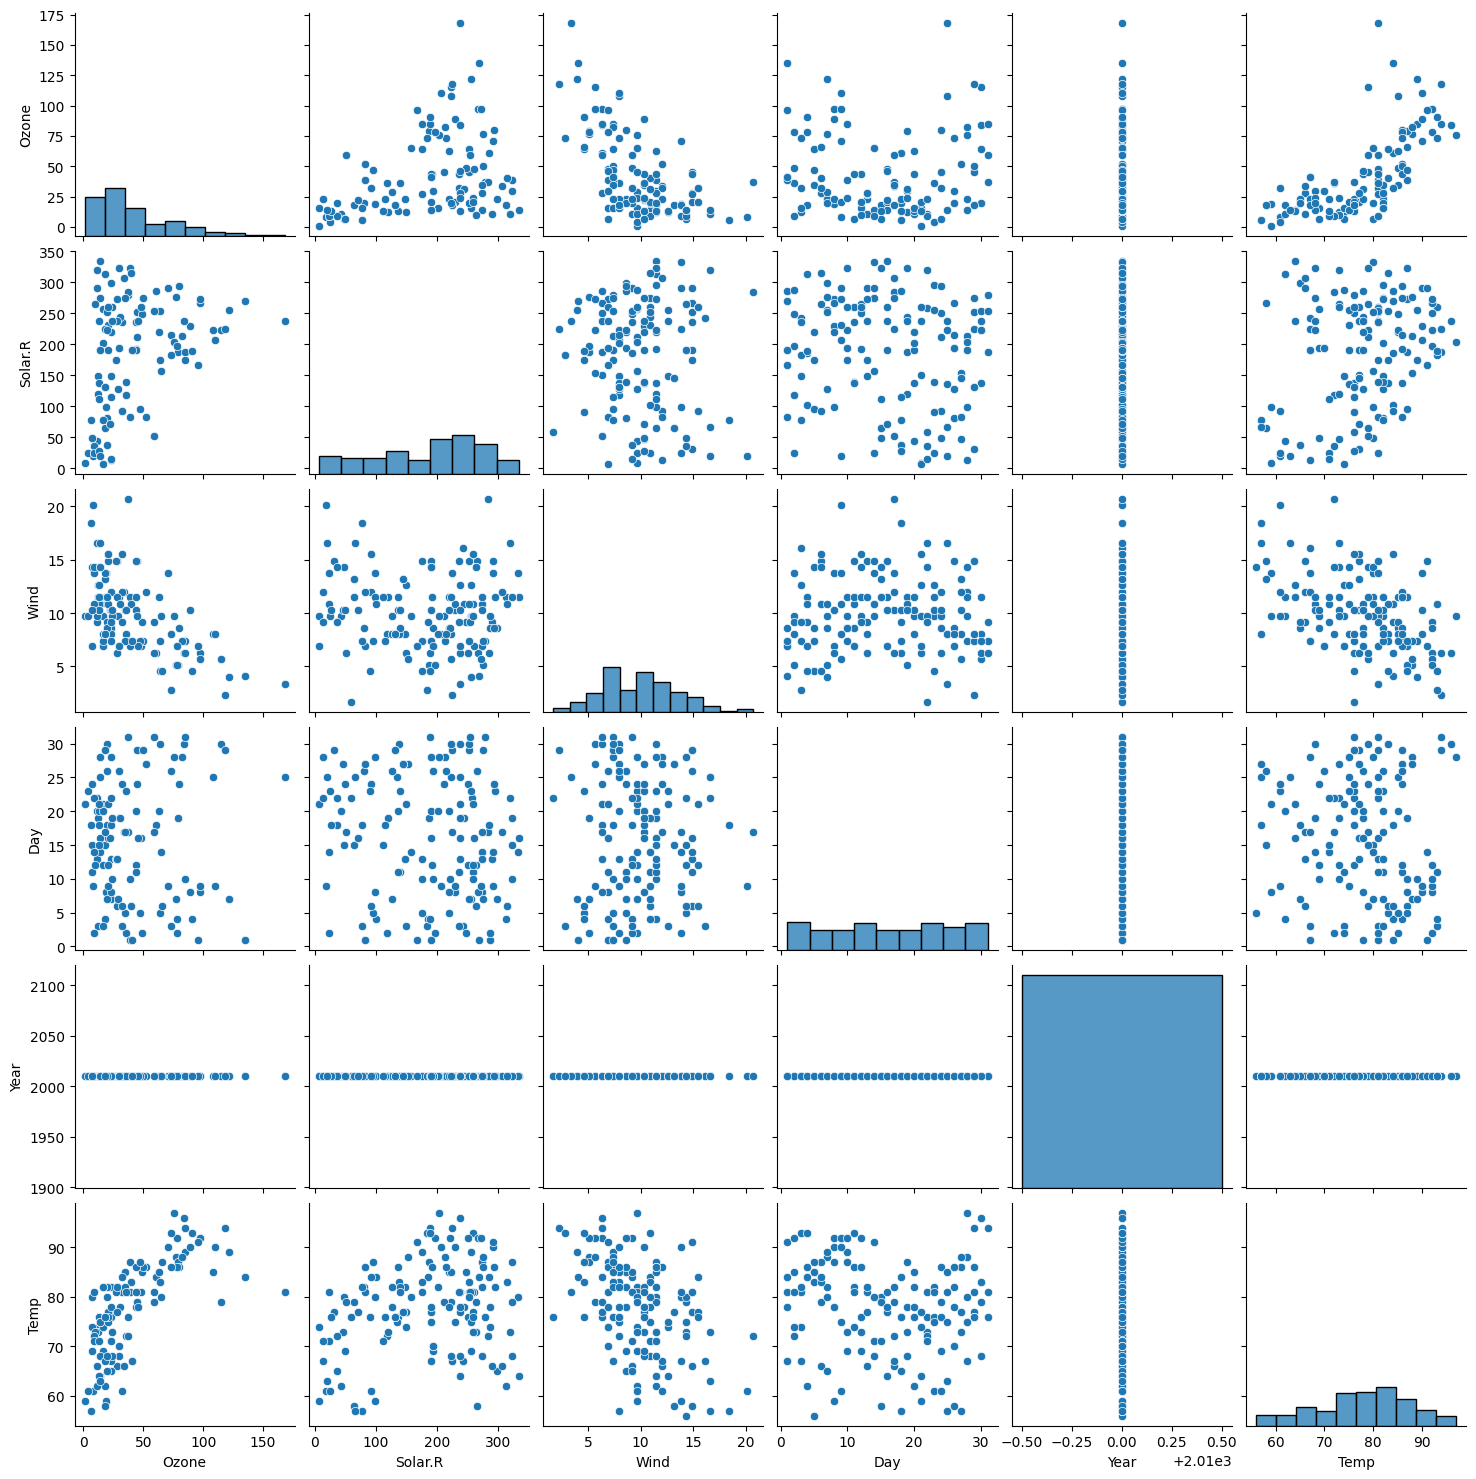

In [9]:
sns.pairplot(df)

In [ ]:
#Correlation coefficient

In [13]:
df.corr(numeric_only=True)

,Ozone,Solar.R,Wind,Day,Year,Temp
Ozone,1.000000,0.348642,-0.593530,-0.035055,NaN,0.694098
Solar.R,0.348642,1.000000,-0.056594,-0.154212,NaN,0.273322
Wind,-0.593530,-0.056594,1.000000,0.040151,NaN,-0.441247
Day,-0.035055,-0.154212,0.040151,1.000000,NaN,-0.124538
Year,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.694098,0.273322,-0.441247,-0.124538,NaN,1.000000


<Axes: >

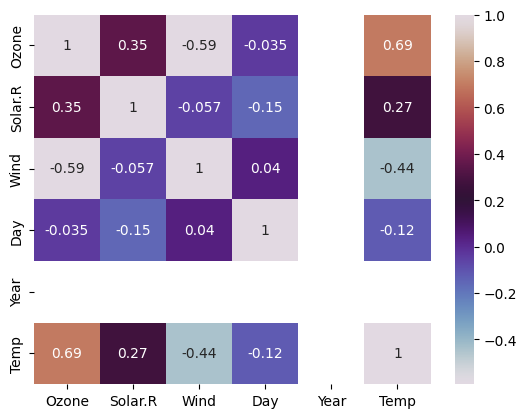

In [17]:
sns.heatmap(df.corr(method='pearson', numeric_only=True), annot = True, cmap='twilight')

# Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

In [18]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S


In [ ]:
#Encoding using pandas dummy function.

In [19]:
pd.get_dummies(data = df, columns=['Weather'], dtype=int)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,5,1,2010,67,0,0,1
2,36.0,118.0,8.0,5,2,2010,72,1,0,0
3,12.0,149.0,12.6,5,3,2010,74,0,1,0
4,18.0,313.0,11.5,5,4,2010,62,0,0,1
5,NaN,NaN,14.3,5,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,1,0,0
155,30.0,193.0,6.9,9,26,2010,70,0,1,0
156,NaN,145.0,13.2,9,27,2010,77,0,0,1
157,14.0,191.0,14.3,9,28,2010,75,0,0,1


In [20]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [21]:
df = pd.get_dummies(data=df,columns= ['Weather'], dtype=int)

In [22]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,5,1,2010,67,0,0,1
2,36.0,118.0,8.0,5,2,2010,72,1,0,0
3,12.0,149.0,12.6,5,3,2010,74,0,1,0
4,18.0,313.0,11.5,5,4,2010,62,0,0,1
5,NaN,NaN,14.3,5,5,2010,56,0,0,1


# **Scaling the data**

- Normalization
    - Scales value within the range of 0 to 1.
- Standardization
    - Uses Z score for scaling.
    - Scale values in such a way that the mean = 0 and standard deviation is 1.

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
sc = StandardScaler()

In [25]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,5,1,2010,67,0,0,1
2,36.0,118.0,8.0,5,2,2010,72,1,0,0
3,12.0,149.0,12.6,5,3,2010,74,0,1,0
4,18.0,313.0,11.5,5,4,2010,62,0,0,1
5,NaN,NaN,14.3,5,5,2010,56,0,0,1


In [26]:
df.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000,158.000000,158.000000,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848,0.310127,0.297468,0.373418
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877,0.464016,0.458598,0.485250
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000,0.000000,0.000000,0.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000,0.000000,0.000000,0.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000,0.000000,0.000000,0.000000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000,1.000000,1.000000,1.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000,1.000000,1.000000,1.000000


In [28]:
df['Month'] = df['Month'].replace("May", 5).astype(int)

In [35]:
sc.fit_transform(df)

array([[-0.01795728,  0.0519743 , -0.73071387, ..., -0.6704784 ,
        -0.65070994,  1.29536331],
       [-0.17187682, -0.7622398 , -0.55929176, ...,  1.49147236,
        -0.65070994, -0.77198419],
       [-0.9106906 , -0.41167539,  0.75494442, ..., -0.6704784 ,
         1.53678305, -0.77198419],
       ...,
       [        nan, -0.45690951,  0.92636654, ..., -0.6704784 ,
        -0.65070994,  1.29536331],
       [-0.84912279,  0.06328283,  1.24064041, ..., -0.6704784 ,
        -0.65070994,  1.29536331],
       [-0.72598716, -0.61522892, -0.55929176, ...,  1.49147236,
        -0.65070994, -0.77198419]])

In [43]:
j = sc.fit(df)

In [56]:
j

StandardScaler()

In [36]:
pd.DataFrame(sc.fit_transform(df), columns=df.columns)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,-0.017957,0.051974,-0.730714,-1.416904,-1.673198,0.0,-1.147590,-0.670478,-0.650710,1.295363
1,-0.171877,-0.762240,-0.559292,-1.416904,-1.561699,0.0,-0.612725,1.491472,-0.650710,-0.771984
2,-0.910691,-0.411675,0.754944,-1.416904,-1.450199,0.0,-0.398779,-0.670478,1.536783,-0.771984
3,-0.725987,1.442923,0.440671,-1.416904,-1.338700,0.0,-1.682455,-0.670478,-0.650710,1.295363
4,NaN,NaN,1.240640,-1.416904,-1.227200,0.0,-2.324293,-0.670478,-0.650710,1.295363
...,...,...,...,...,...,...,...,...,...,...
153,-0.017957,0.051974,-0.730714,-1.416904,-1.673198,0.0,-1.147590,1.491472,-0.650710,-0.771984
154,-0.356580,0.085900,-0.873566,1.372764,1.114289,0.0,-0.826671,-0.670478,1.536783,-0.771984
155,NaN,-0.456910,0.926367,1.372764,1.225789,0.0,-0.077860,-0.670478,-0.650710,1.295363
156,-0.849123,0.063283,1.240640,1.372764,1.337288,0.0,-0.291806,-0.670478,-0.650710,1.295363


In [37]:
scaled_data = pd.DataFrame(sc.fit_transform(df), columns=df.columns)
scaled_data

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,-0.017957,0.051974,-0.730714,-1.416904,-1.673198,0.0,-1.147590,-0.670478,-0.650710,1.295363
1,-0.171877,-0.762240,-0.559292,-1.416904,-1.561699,0.0,-0.612725,1.491472,-0.650710,-0.771984
2,-0.910691,-0.411675,0.754944,-1.416904,-1.450199,0.0,-0.398779,-0.670478,1.536783,-0.771984
3,-0.725987,1.442923,0.440671,-1.416904,-1.338700,0.0,-1.682455,-0.670478,-0.650710,1.295363
4,NaN,NaN,1.240640,-1.416904,-1.227200,0.0,-2.324293,-0.670478,-0.650710,1.295363
...,...,...,...,...,...,...,...,...,...,...
153,-0.017957,0.051974,-0.730714,-1.416904,-1.673198,0.0,-1.147590,1.491472,-0.650710,-0.771984
154,-0.356580,0.085900,-0.873566,1.372764,1.114289,0.0,-0.826671,-0.670478,1.536783,-0.771984
155,NaN,-0.456910,0.926367,1.372764,1.225789,0.0,-0.077860,-0.670478,-0.650710,1.295363
156,-0.849123,0.063283,1.240640,1.372764,1.337288,0.0,-0.291806,-0.670478,-0.650710,1.295363


In [38]:
scaled_data.describe()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
count,1.200000e+02,1.510000e+02,1.580000e+02,1.580000e+02,1.580000e+02,158.0,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,-1.036208e-16,1.411674e-16,-2.923119e-16,-1.798842e-16,6.745659e-17,0.0,2.473408e-16,-6.464590e-17,-9.275281e-17,2.248553e-17
std,1.004193e+00,1.003328e+00,1.003180e+00,1.003180e+00,1.003180e+00,0.0,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-1.249314e+00,-2.017487e+00,-2.359224e+00,-1.416904e+00,-1.673198e+00,0.0,-2.324293e+00,-6.704784e-01,-6.507099e-01,-7.719842e-01
25%,-7.259872e-01,-7.509313e-01,-7.307139e-01,-7.194873e-01,-8.927018e-01,0.0,-6.127251e-01,-6.704784e-01,-6.507099e-01,-7.719842e-01
50%,-3.411883e-01,1.311340e-01,-7.359578e-02,-2.207016e-02,-7.056931e-04,0.0,8.259941e-02,-6.704784e-01,-6.507099e-01,-7.719842e-01
75%,6.131128e-01,8.096458e-01,5.478094e-01,6.753470e-01,8.912904e-01,0.0,6.709509e-01,1.491472e+00,1.536783e+00,1.295363e+00
max,3.891599e+00,1.680402e+00,3.069143e+00,1.372764e+00,1.671787e+00,0.0,2.061600e+00,1.491472e+00,1.536783e+00,1.295363e+00


In [ ]:
#MinMaxScalar

In [39]:
mn = MinMaxScaler()

In [40]:
minmax_scaled = pd.DataFrame(mn.fit_transform(df), columns=df.columns)
minmax_scaled

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,0.239521,0.559633,0.300000,0.0,0.000000,0.0,0.268293,0.0,0.0,1.0
1,0.209581,0.339450,0.331579,0.0,0.033333,0.0,0.390244,1.0,0.0,0.0
2,0.065868,0.434251,0.573684,0.0,0.066667,0.0,0.439024,0.0,1.0,0.0
3,0.101796,0.935780,0.515789,0.0,0.100000,0.0,0.146341,0.0,0.0,1.0
4,NaN,NaN,0.663158,0.0,0.133333,0.0,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
153,0.239521,0.559633,0.300000,0.0,0.000000,0.0,0.268293,1.0,0.0,0.0
154,0.173653,0.568807,0.273684,1.0,0.833333,0.0,0.341463,0.0,1.0,0.0
155,NaN,0.422018,0.605263,1.0,0.866667,0.0,0.512195,0.0,0.0,1.0
156,0.077844,0.562691,0.663158,1.0,0.900000,0.0,0.463415,0.0,0.0,1.0


In [41]:
minmax_scaled.describe()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
count,120.000000,151.000000,158.000000,158.000000,158.000000,158.0,158.000000,158.000000,158.000000,158.000000
mean,0.243014,0.545578,0.434610,0.507911,0.500211,0.0,0.529948,0.310127,0.297468,0.373418
std,0.195334,0.271324,0.184803,0.359605,0.299906,0.0,0.228729,0.464016,0.458598,0.485250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.101796,0.342508,0.300000,0.250000,0.233333,0.0,0.390244,0.000000,0.000000,0.000000
50%,0.176647,0.581040,0.421053,0.500000,0.500000,0.0,0.548780,0.000000,0.000000,0.000000
75%,0.362275,0.764526,0.535526,0.750000,0.766667,0.0,0.682927,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000
